
# Project: Data Wrangling of WeRateDogs Tweets

> In this project, We will apply the process of data wrangling for WeRateDogs tweets, we are going to pass by each step from gathering the data, assessing it, and cleaning it. Then, we will work on analyzing these cleaned tweets and communicate our findings. The python libraries used for this project are *NumPy, pandas, requests, tweepy, json and Matplotlib* which makes our analysis easier.

## 1. Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#dw">Data Wrangling</a></li>
    <ul>
        <li><a href="#Gather">Gather</a></li>
        <li><a href="#Assess">Assess</a></li>
        <li><a href="#Clean">Clean</a></li>
    </ul>
<li><a href="#sav">Storing, Analyzing, and Visualizing</a></li>
<li><a href="#Reports">Reports</a></li>
</ul>

# 2. Introduction


In [78]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

% matplotlib inline

<a id='dw'></a>
# 3. Data Wrangling

<a id='Gather'></a>
## 3.1 Gather

### 3.1.1 Importing Archived Tweets

In [79]:
# Reading the first source from CSV
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [80]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [81]:
df_tweets.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 3.1.2 Importing Image Predictions 

In [82]:
# Getting the request
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [83]:
# save it
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [84]:
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [85]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.1.3 Extracting tweets from Twitter API

In [86]:
# Twitter Keys
consumer_key = 'KEY'
consumer_secret = 'KEY'
access_token = 'KEY'
access_secret = 'KEY'

In [87]:
# Creating the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [88]:
# Extracting the tweets and save it to list
tweets = []
success=0
failed=0
for tweet_id in df_tweets.tweet_id:  
    try:  
        tweets.append(api.get_status(id=tweet_id)._json)   
        success = success +1
    except:
        failed = failed + 1 
        next

In [89]:
success

In [90]:
failed

In [91]:
# Store it as txt
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets, indent=4))

In [92]:
# Reading txt file line by line into a dataframe
Tweets_list=[]
with open('tweet_json.txt', encoding='utf-8') as json_tweet:  
    tweets = json.load(json_tweet)
    for each_tweet in tweets:
        
        
        tweet_time = each_tweet['created_at']
        tweet_id = each_tweet['id']
        tweet_text = each_tweet['text'] 
        tweet_url = tweet_text[tweet_text.find('https'):]  
        tweet_like = each_tweet['favorite_count']
        tweet_retweet = each_tweet['retweet_count']
        tweet_device = each_tweet['source'][each_tweet['source'].find('rel="nofollow">') + 15:-4]
        

        Tweets_list.append({'tweet_id': str(tweet_id),
                             'time': tweet_time,
                             'text': str(tweet_text),
                             'like': int(tweet_like),
                             'retweet': int(tweet_retweet),
                             'device': tweet_device,
                             'url': tweet_url,
                            })
        df_tweets_desc = pd.DataFrame(Tweets_list, columns = ['tweet_id', 'time','text', 
                                                           'like', 'retweet','device', 
                                                           'url'])


In [93]:
df_tweets_desc.head()

,tweet_id,time,text,like,retweet,device,url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3


<a id='Assess'></a>
## 3.2 Assess

In [94]:
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [95]:
df_tweets.duplicated().sum()

0

In [97]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [98]:
df_tweets.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [99]:
df_tweets.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [100]:
df_tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [101]:
df_tweets.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [102]:
df_tweets.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Bailey            7
Toby              7
Buddy             7
Daisy             7
an                7
Oscar             6
Bella             6
Scout             6
Dave              6
Stanley           6
Jack              6
Milo              6
Koda              6
Rusty             6
Leo               6
Jax               6
George            5
               ... 
Shooter           1
Scruffers         1
Maks              1
Bert              1
Lacy              1
Christoper        1
such              1
Kota              1
old               1
Ebby              1
Tycho             1
Pavlov            1
Oddie             1
Pete              1
unacceptable      1
Brownie           1
O                 1
Banditt           1
Ester             1


In [103]:
df_tweets.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [104]:
df_tweets.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [105]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [106]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
df_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [108]:
# df_predictions.p1.value_counts()
df_tweets.duplicated().sum()

0

In [109]:
df_tweets_desc

,tweet_id,time,text,like,retweet,device,url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...,18267,2684,Twitter for iPhone,https://t.co/xx5cilW0Dd
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...,10638,1726,Twitter for iPhone,https://t.co/MV01Q820LT
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...,58370,16280,Twitter for iPhone,https://t.co/hrcFOGi12V
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...,25152,3726,Twitter for iPhone,https://t.co/UkrdQyoYxV
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...,28670,6289,Twitter for iPhone,https://t.co/l3TSS3o2M0


In [110]:
df_tweets_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 7 columns):
tweet_id    874 non-null object
time        874 non-null object
text        874 non-null object
like        874 non-null int64
retweet     874 non-null int64
device      874 non-null object
url         874 non-null object
dtypes: int64(2), object(5)
memory usage: 47.9+ KB


In [111]:
df_tweets_desc.device.value_counts()

Twitter for iPhone     852
Vine - Make a Scene     13
Twitter Web Client       9
Name: device, dtype: int64

In [112]:
df_tweets_desc.like.value_counts()

0        149
9395       2
19499      2
14234      2
4779       2
17504      2
19786      1
5462       1
14688      1
10590      1
2114       1
12615      1
30041      1
31048      1
7509       1
6485       1
8523       1
11604      1
26643      1
9569       1
9552       1
5455       1
25934      1
15693      1
24913      1
10077      1
9570       1
21875      1
6525       1
25980      1
        ... 
28289      1
3712       1
6782       1
29309      1
8778       1
4731       1
7802       1
11924      1
10902      1
5584       1
11109      1
8890       1
14008      1
24245      1
12977      1
8880       1
35502      1
5181       1
683        1
5801       1
25239      1
26279      1
20133      1
12962      1
24223      1
669        1
19100      1
27290      1
10905      1
10071      1
Name: like, Length: 721, dtype: int64

#### Quality
##### `Twitter Archive` table
- Delete Retweeted tweets
- Delete unnecessary columns (retweeted_status_user_id,retweeted_status_id,retweeted_status_timestamp,expanded_urls) 
- Replace faulty names or uncorrect names
- Separate timestamp to (month_arc, year_arc)
- Convert tweet_id type to str

##### `Image Predictions` table
- Capitalize the first letter of each word in (p1, p2, p3) columns
- Remove the underscore between the words in (p1, p2, p3) columns
- Convert tweet_id type to str

##### `Tweets Description` table
- Delete Retweeted tweets
- Separate timestamp to (month, year)


#### Tidness
- Convert (doggo,floofer, pupper, puppo) to one column (Kind)
- Merge (Inner Join) all three Dataframes into one dataframe, doing inner join will automatically exclude deleted tweets. 

<a id='Clean'></a>

## 3.3 Clean

 #### 3.3.1 `Twitter Archive`: Delete Retweeted tweets

##### Define
*Exclude the retweeted tweets from the dataset.*

##### Code

In [113]:
# Create a cleaned dataset
df_tweets_clean = df_tweets.copy()

In [114]:
df_tweets_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [115]:
# exclude retweeted tweets
df_tweets_clean.query("retweeted_status_id == 'NaN'", inplace=True)

In [116]:
# reset index
df_tweets_clean.reset_index()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Test

In [117]:
df_tweets_clean.query("retweeted_status_id != 'NaN'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 3.3.2 `Twitter Archive`: Delete Unnecessary Columns (retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, expanded_urls)

##### Define
*There are some unused fields in the dataframe, that need to be removed. The fields are source, in_reply_to_status_id,  in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp and expanded_urls*

##### Code

In [118]:
# Droping unwanted fields
df_tweets_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

##### Test

In [119]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### 3.3.3 `Twitter Archive`: Replace Faulty Names or Uncorrect Names

##### Define
*The column has a lot of incorrect or misspelled names that has to be modified*

##### Code

In [120]:
# small function returns if the firt letter small or no
def isSmall(str):
    if(str[:1].lower() == str[:1]):
        return str
    else:
        return '-1'

In [121]:
# creating a list with all names that have small letter as first letter
x_list = []
for i in df_tweets_clean.name:
    if(isSmall(i).isalpha()):
        x_list.append(i)
x_list

['such',
 'a',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [122]:
# removing faulty names
list = ["by","old","all","unacceptable","this","my","not","the","quite", "space","an", "a", "space", "just", "light", "one",  "life",  "such",  "officially",  "infuriating",  "actually",  "very",  "mad", "getting", "one", "his", "incredibly"]
for i in list:
    df_tweets_clean['name'].replace(i, 'None', inplace=True)

##### Test

In [123]:
# making sure the list is empty
x_list = []
for i in df_tweets_clean.name:
    if(isSmall(i).isalpha()):
        x_list.append(i)
x_list

[]

#### 3.3.4 `Twitter Archive`: Separate Timestamp to (month_arc, year_arc)

##### Define
*Divide the timestamp into multiple fields such as year and month. It will be useful for analysis.*

##### Code

In [124]:
# Convert timestamp to datetime
df_tweets_clean['timestamp'] = pd.to_datetime(df_tweets_clean['timestamp'])

#extract year and month to new columns
df_tweets_clean['year'] = df_tweets_clean['timestamp'].dt.year
df_tweets_clean['month'] = df_tweets_clean['timestamp'].dt.month

##### Test

In [125]:
df_tweets_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7


#### 3.3.5 `Twitter Archive`: Convert tweet_id Type to str

##### Define
*Convert tweet_id to str in order to join them with other two sets*

##### Code

In [126]:
# convert tweet id to string
df_tweets_clean['tweet_id']  = df_tweets_clean['tweet_id'].astype(str)

##### Test

In [127]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 220.9+ KB


#### 3.3.6 `Image Predictions`: Capitalize The First Letter of Each Word in (p1, p2, p3) Columns

##### Define
*Capitalize each word in the (p1,p2,p3) and change its name to type_predication*

##### Code

In [128]:
# create a copy of the dataframe
df_predictions_clean = df_predictions.copy()

In [129]:
list = ['p1','p2','p3']
list2 = ['p1_conf','p2_conf','p3_conf']
list3 = ['p1_dog','p2_dog','p3_dog']




# using the function title() to capitalize first word
for idx, i in enumerate(list):
    df_predictions_clean[i] = df_predictions_clean[i].str.title()
    df_predictions_clean.rename(columns={i : 'type_predication_' + i[1:]}, inplace=True)
    df_predictions_clean.rename(columns={list2[idx] : 'type_predication_' + i[1:] + '_conf'}, inplace=True)
    df_predictions_clean.rename(columns={list3[idx] : 'type_predication_' + i[1:] + '_dog'}, inplace=True)

##### Test

In [130]:
df_predictions_clean.type_predication_1.value_counts()

Golden_Retriever             150
Labrador_Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy_Poodle                    39
Pomeranian                    38
Cocker_Spaniel                30
Malamute                      30
French_Bulldog                26
Chesapeake_Bay_Retriever      23
Miniature_Pinscher            23
Seat_Belt                     22
German_Shepherd               20
Siberian_Husky                20
Staffordshire_Bullterrier     20
Web_Site                      19
Cardigan                      19
Teddy                         18
Shetland_Sheepdog             18
Maltese_Dog                   18
Beagle                        18
Eskimo_Dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_Terrier              17
Italian_Greyhound             16
Kuvasz                        16
          

In [131]:
df_predictions_clean.type_predication_2.value_counts()

Labrador_Retriever                104
Golden_Retriever                   92
Cardigan                           74
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_Retriever           41
French_Bulldog                     41
Toy_Poodle                         37
Cocker_Spaniel                     34
Siberian_Husky                     33
Miniature_Poodle                   33
Beagle                             28
Pembroke                           27
Eskimo_Dog                         27
Collie                             27
Kuvasz                             26
Italian_Greyhound                  22
Pekinese                           21
American_Staffordshire_Terrier     21
Malinois                           20
Miniature_Pinscher                 20
Toy_Terrier                        20
Samoyed                            20
Chow                               20
Boston_Bull                        19
Norwegian_Elkhound                 19
Staffordshir

In [132]:
df_predictions_clean.type_predication_3.value_counts()

Labrador_Retriever                79
Chihuahua                         58
Golden_Retriever                  48
Eskimo_Dog                        38
Kelpie                            35
Kuvasz                            34
Staffordshire_Bullterrier         32
Chow                              32
Cocker_Spaniel                    31
Beagle                            31
Pekinese                          29
Pomeranian                        29
Toy_Poodle                        29
Chesapeake_Bay_Retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_Bulldog                    26
Malamute                          26
American_Staffordshire_Terrier    24
Pug                               23
Cardigan                          23
Basenji                           21
Toy_Terrier                       20
Bull_Mastiff                      20
Siberian_Husky                    19
Boston_Bull                       17
Shetland_Sheepdog                 17
L

In [133]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null int64
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
type_predication_1         2075 non-null object
type_predication_1_conf    2075 non-null float64
type_predication_1_dog     2075 non-null bool
type_predication_2         2075 non-null object
type_predication_2_conf    2075 non-null float64
type_predication_2_dog     2075 non-null bool
type_predication_3         2075 non-null object
type_predication_3_conf    2075 non-null float64
type_predication_3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3.3.7 `Image Predictions`: Remove the Underscore Between the Words in (p1, p2, p3) Columns

##### Define
*Remove the underscore sing from the values of the (p1,p2,p3)*

##### Code

In [134]:
# Replacing the underscore with space
df_predictions_clean['type_predication_1'] = df_predictions_clean['type_predication_1'].str.replace('_',' ')
df_predictions_clean['type_predication_2'] = df_predictions_clean['type_predication_2'].str.replace('_',' ')
df_predictions_clean['type_predication_3'] = df_predictions_clean['type_predication_3'].str.replace('_',' ')

##### Test

In [135]:
df_predictions_clean.type_predication_1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Malamute                      30
Cocker Spaniel                30
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            23
Seat Belt                     22
Staffordshire Bullterrier     20
Siberian Husky                20
German Shepherd               20
Cardigan                      19
Web Site                      19
Teddy                         18
Eskimo Dog                    18
Maltese Dog                   18
Shetland Sheepdog             18
Beagle                        18
Shih-Tzu                      17
Lakeland Terrier              17
Rottweiler                    17
Italian Greyhound             16
Kuvasz                        16
          

In [136]:
df_predictions_clean.type_predication_2.value_counts()

Labrador Retriever                104
Golden Retriever                   92
Cardigan                           74
Chihuahua                          44
Pomeranian                         42
Chesapeake Bay Retriever           41
French Bulldog                     41
Toy Poodle                         37
Cocker Spaniel                     34
Miniature Poodle                   33
Siberian Husky                     33
Beagle                             28
Collie                             27
Eskimo Dog                         27
Pembroke                           27
Kuvasz                             26
Italian Greyhound                  22
American Staffordshire Terrier     21
Pekinese                           21
Malinois                           20
Miniature Pinscher                 20
Chow                               20
Samoyed                            20
Toy Terrier                        20
Norwegian Elkhound                 19
Boston Bull                        19
Staffordshir

In [137]:
df_predictions_clean.type_predication_3.value_counts()

Labrador Retriever                79
Chihuahua                         58
Golden Retriever                  48
Eskimo Dog                        38
Kelpie                            35
Kuvasz                            34
Chow                              32
Staffordshire Bullterrier         32
Cocker Spaniel                    31
Beagle                            31
Toy Poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake Bay Retriever          27
Great Pyrenees                    27
Malamute                          26
French Bulldog                    26
American Staffordshire Terrier    24
Cardigan                          23
Pug                               23
Basenji                           21
Toy Terrier                       20
Bull Mastiff                      20
Siberian Husky                    19
Shetland Sheepdog                 17
Boston Bull                       17
D

#### 3.3.8 `Image Predictions`: Convert tweet_id Type to str

##### Define
*Convert tweet_id to str in order to join them with other two sets*

##### Code

In [138]:
# convert tweet id to string
df_predictions_clean['tweet_id']  = df_predictions_clean['tweet_id'].astype(str)

##### Test

In [139]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null object
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
type_predication_1         2075 non-null object
type_predication_1_conf    2075 non-null float64
type_predication_1_dog     2075 non-null bool
type_predication_2         2075 non-null object
type_predication_2_conf    2075 non-null float64
type_predication_2_dog     2075 non-null bool
type_predication_3         2075 non-null object
type_predication_3_conf    2075 non-null float64
type_predication_3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 3.3.9 `Tweets Description`: Delete Retweeted tweets


##### Define
*Exclude the retweeted tweets from the dataset.*

##### Code

In [140]:
# create a copy of the dataframe
df_tweets_desc_clean = df_tweets_desc.copy()

In [141]:
df_tweets_desc_clean.head()

,tweet_id,time,text,like,retweet,device,url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3


In [142]:
# this tweet is a retweet with index 844
df_tweets_desc_clean['text'][844]

'RT @dog_rates: "Tristan do not speak to me with that kind of tone or I will take away the Xbox." 10/10 https://t.co/VGPH0TfESw'

In [143]:
# exclude retweeted tweets
for idx, i in enumerate(df_tweets_desc_clean['text']):
    if(df_tweets_desc_clean['text'][idx].startswith('RT')):
        df_tweets_desc_clean.drop([idx],inplace=True)
        print(str(idx) +' '+ i)

31 RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35 RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
67 RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
72 RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below

https:/…
73 RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
77 RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G
90 RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
95 RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her who

In [144]:
# reset index
df_tweets_desc_clean.reset_index()

,index,tweet_id,time,text,like,retweet,device,url
0,0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ
4,4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3
5,5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...,18267,2684,Twitter for iPhone,https://t.co/xx5cilW0Dd
6,6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...,10638,1726,Twitter for iPhone,https://t.co/MV01Q820LT
7,7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...,58370,16280,Twitter for iPhone,https://t.co/hrcFOGi12V
8,8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...,25152,3726,Twitter for iPhone,https://t.co/UkrdQyoYxV
9,9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...,28670,6289,Twitter for iPhone,https://t.co/l3TSS3o2M0


##### Test

In [145]:
df_tweets_desc_clean.head()

,tweet_id,time,text,like,retweet,device,url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3


#### 3.3.10 `Tweets Description`: Separate timestamp to (month, year)

##### Define
*Divide the timestamp into multiple fields such as year and month. It will be useful later for analysis.*

In [146]:
from datetime import datetime

In [147]:
# change the timestamp to a readable timestamp
dtime = 'Fri Oct 09 10:01:41 +0000 2015'
new_datetime = datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
print((new_datetime))

2015-10-09 10:01:41


##### Code

In [148]:
# Convert timestamp to datetime
df_tweets_desc_clean['time'] = pd.to_datetime(df_tweets_desc_clean['time'])

#extract year and month to new columns
df_tweets_desc_clean['year'] = df_tweets_desc_clean['time'].dt.year
df_tweets_desc_clean['month'] = df_tweets_desc_clean['time'].dt.month

##### Test

In [149]:
df_tweets_desc_clean

,tweet_id,time,text,like,retweet,device,url,year,month
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,34665,7237,Twitter for iPhone,https://t.co/MgUWQ76dJU,2017,8
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,30041,5420,Twitter for iPhone,https://t.co/aQFSeaCu9L,2017,8
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,22619,3580,Twitter for iPhone,https://t.co/r0YlrsGCgy,2017,7
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,37946,7446,Twitter for iPhone,https://t.co/tD36da7qLQ,2017,7
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,36217,7993,Twitter for iPhone,https://t.co/0g0KMIVXZ3,2017,7
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,18267,2684,Twitter for iPhone,https://t.co/xx5cilW0Dd,2017,7
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,10638,1726,Twitter for iPhone,https://t.co/MV01Q820LT,2017,7
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,58370,16280,Twitter for iPhone,https://t.co/hrcFOGi12V,2017,7
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,25152,3726,Twitter for iPhone,https://t.co/UkrdQyoYxV,2017,7
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,28670,6289,Twitter for iPhone,https://t.co/l3TSS3o2M0,2017,7


#### 3.3.11 `Tidness`: Convert (doggo,floofer, pupper, puppo) to One Column (Kind)

##### Define
*Create one column that contains all flag whether it is a doggo, floof, pupper and puppo*

##### Code

In [150]:
df_tweets_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,2017,7
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,2017,7
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,2017,7
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,2017,7
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,2017,7


In [151]:
df_kind = df_tweets_clean[['tweet_id','doggo','floofer','pupper','puppo']].copy()

In [152]:
df_kind['kind'] = df_kind[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

In [153]:
df_kind['kind'].replace("NoneNoneNoneNone","None ", inplace=True)
df_kind['kind'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_kind['kind'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_kind['kind'].replace("NoneNonepupperNone","pupper", inplace=True)
df_kind['kind'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_kind['kind'].replace("doggoNonepupperNone","pupper", inplace=True)
df_kind['kind'].replace("doggoNoneNonepuppo","puppo", inplace=True)
df_kind['kind'].replace("doggoflooferNoneNone","floofer", inplace=True)

In [154]:
df_kind

,tweet_id,doggo,floofer,pupper,puppo,kind
0,892420643555336193,None,None,None,None,None
1,892177421306343426,None,None,None,None,None
2,891815181378084864,None,None,None,None,None
3,891689557279858688,None,None,None,None,None
4,891327558926688256,None,None,None,None,None
5,891087950875897856,None,None,None,None,None
6,890971913173991426,None,None,None,None,None
7,890729181411237888,None,None,None,None,None
8,890609185150312448,None,None,None,None,None
9,890240255349198849,doggo,None,None,None,doggo


In [155]:
df_kind.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [156]:
df_tweets_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [157]:
df_tweets_clean = df_tweets_clean.join(df_kind.set_index('tweet_id'),how='inner',on='tweet_id')

In [158]:
df_tweets_clean.reset_index()

,index,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,kind
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017,8,None
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017,8,None
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017,7,None
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017,7,None
4,4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017,7,None
5,5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,2017,7,None
6,6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,2017,7,None
7,7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,2017,7,None
8,8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,2017,7,None
9,9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,doggo


##### Test

In [159]:
df_tweets_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,kind
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017,8,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017,8,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017,7,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017,7,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017,7,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,2017,7,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,2017,7,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,2017,7,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,2017,7,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017,7,doggo


#### 3.3.12 `Tidness`: Merge All Three Dataframes Into One Dataframe.

##### Define
*Use an inner join to combine the datasets together into a single dataframe*

##### Code

In [160]:
df_tweets_desc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 873
Data columns (total 9 columns):
tweet_id    725 non-null object
time        725 non-null datetime64[ns]
text        725 non-null object
like        725 non-null int64
retweet     725 non-null int64
device      725 non-null object
url         725 non-null object
year        725 non-null int64
month       725 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 76.6+ KB


In [161]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                   2075 non-null object
jpg_url                    2075 non-null object
img_num                    2075 non-null int64
type_predication_1         2075 non-null object
type_predication_1_conf    2075 non-null float64
type_predication_1_dog     2075 non-null bool
type_predication_2         2075 non-null object
type_predication_2_conf    2075 non-null float64
type_predication_2_dog     2075 non-null bool
type_predication_3         2075 non-null object
type_predication_3_conf    2075 non-null float64
type_predication_3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [162]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
kind                  2175 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 169.9+ KB


In [163]:
# Join all the dataframes on tweet_id
df_twitter = pd.merge(df_tweets_clean,df_predictions_clean, on = ['tweet_id'])
df_twitter = pd.merge(df_twitter,df_tweets_desc_clean, on = ['tweet_id'])

##### Test

In [164]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 653
Data columns (total 28 columns):
tweet_id                   654 non-null object
timestamp                  654 non-null datetime64[ns]
text_x                     654 non-null object
rating_numerator           654 non-null int64
rating_denominator         654 non-null int64
name                       654 non-null object
year_x                     654 non-null int64
month_x                    654 non-null int64
kind                       654 non-null object
jpg_url                    654 non-null object
img_num                    654 non-null int64
type_predication_1         654 non-null object
type_predication_1_conf    654 non-null float64
type_predication_1_dog     654 non-null bool
type_predication_2         654 non-null object
type_predication_2_conf    654 non-null float64
type_predication_2_dog     654 non-null bool
type_predication_3         654 non-null object
type_predication_3_conf    654 non-null float64


<a id='sav'></a>
# 4. Storing, Analyzing, and Visualizing

## 4.1 Storing

In [165]:
# store csva
df_twitter.to_csv('twitter_archive_master.csv')

## 4.2 Analyzing, and Visualizing

### 4.2.1 Insight 1

> The count of type dogs and the relationship with the favorite/retweet counts.

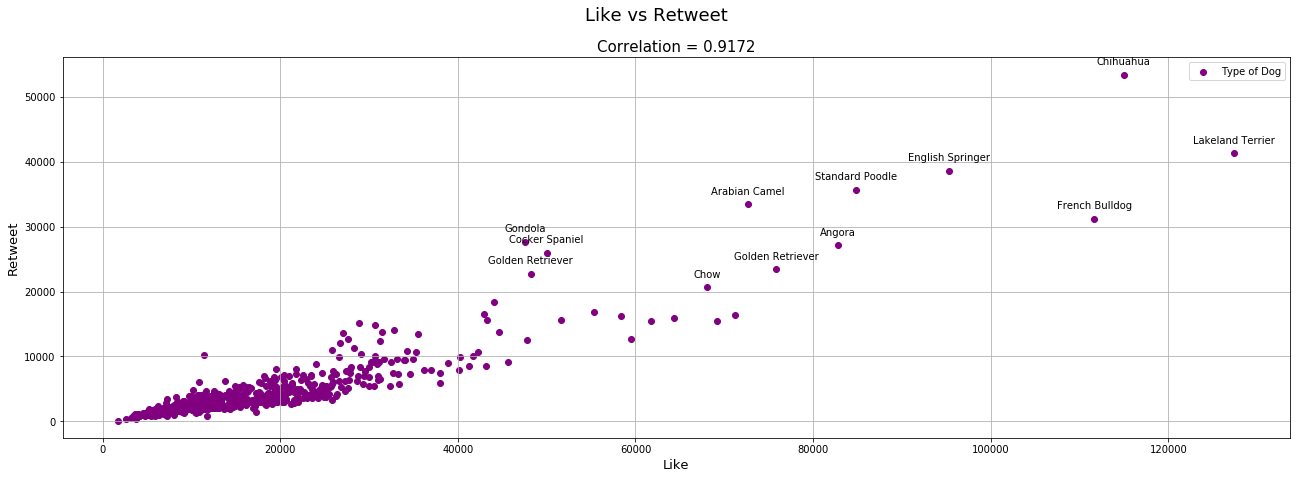

In [166]:
plt.figure(figsize=(22,7))
plt.scatter(df_twitter['like'], df_twitter['retweet'], color='purple', marker='o', label='Type of Dog')

plt.suptitle('Like vs Retweet', fontsize=18)
plt.xlabel('Like', fontsize=13)
plt.ylabel('Retweet', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

correlation = df_twitter['like'].corr(df_twitter['retweet'])
plt.title('Correlation = ' + "{:0.4f}".format(correlation), fontsize=15)

for x,z,q in zip(df_twitter['like'], df_twitter['retweet'], df_twitter['type_predication_1']):
    label = "{:s}".format(q)
    if(x>80000 or z>20000):
        plt.annotate(label, # this is the text
                     (x,z), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')

plt.show()

# plt.show()

In [167]:
# Group by Retweet / Type
df_insight_1 = df_twitter.groupby(['type_predication_1','retweet']).retweet.sum().sort_values().groupby(level=0).tail(1).to_frame()
df_insight_1.columns = ['Retweets Count']
df_insight_1.reset_index(level=[0,1],inplace=True)
df_insight_1.drop(columns='retweet', inplace=True)
df_insight_1.sort_values(by='Retweets Count', ascending=False,inplace=True)

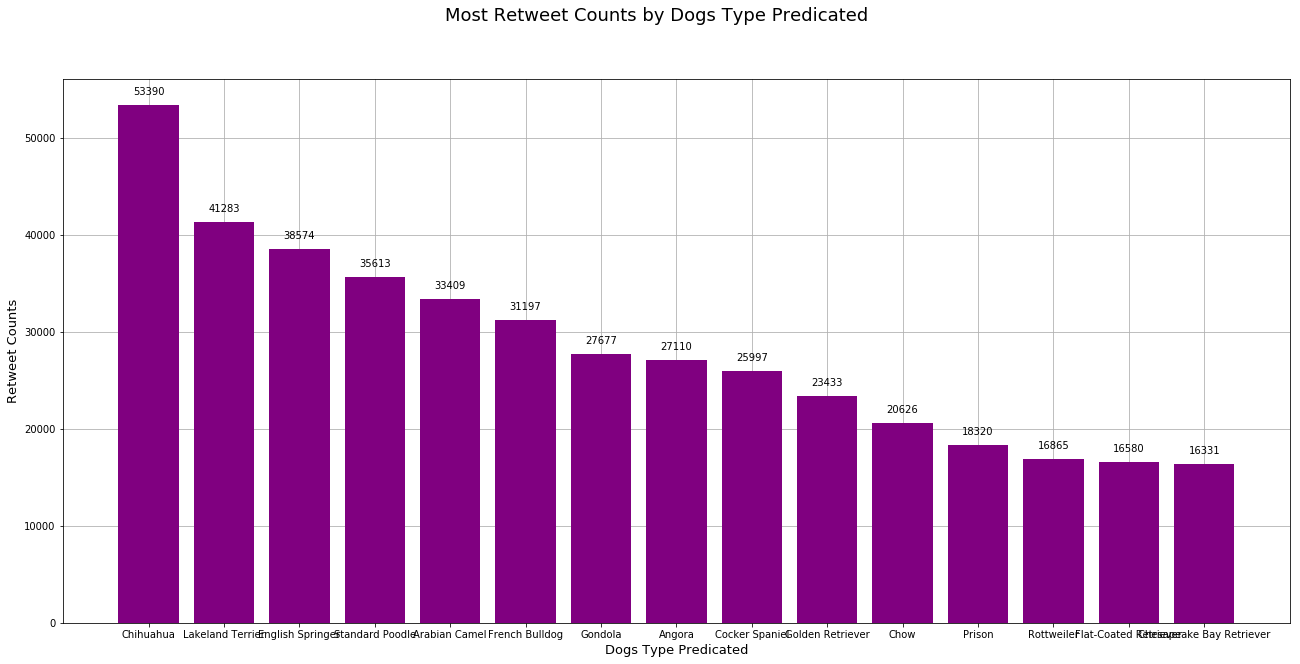

In [168]:
plt.figure(figsize=(22,10))



y_pos = np.arange(len(df_insight_1['type_predication_1'][:15]))

plt.bar(y_pos, df_insight_1['Retweets Count'][:15], align='center', color='purple',zorder=3)
plt.xticks(y_pos, df_insight_1['type_predication_1'][:15])

plt.suptitle('Most Retweet Counts by Dogs Type Predicated', fontsize=18)
plt.xlabel('Dogs Type Predicated', fontsize=13)
plt.ylabel('Retweet Counts', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, df_insight_1['Retweets Count']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [169]:
# Group by Like / Type 
df_insight_1_1 = df_twitter.groupby(['type_predication_1','like']).like.sum().sort_values().groupby(level=0).tail(1).to_frame()
df_insight_1_1.columns = ['Likes Count']
df_insight_1_1.reset_index(level=[0,1],inplace=True)
df_insight_1_1.drop(columns='like', inplace=True)
df_insight_1_1.sort_values(by='Likes Count',  ascending=False,inplace=True)

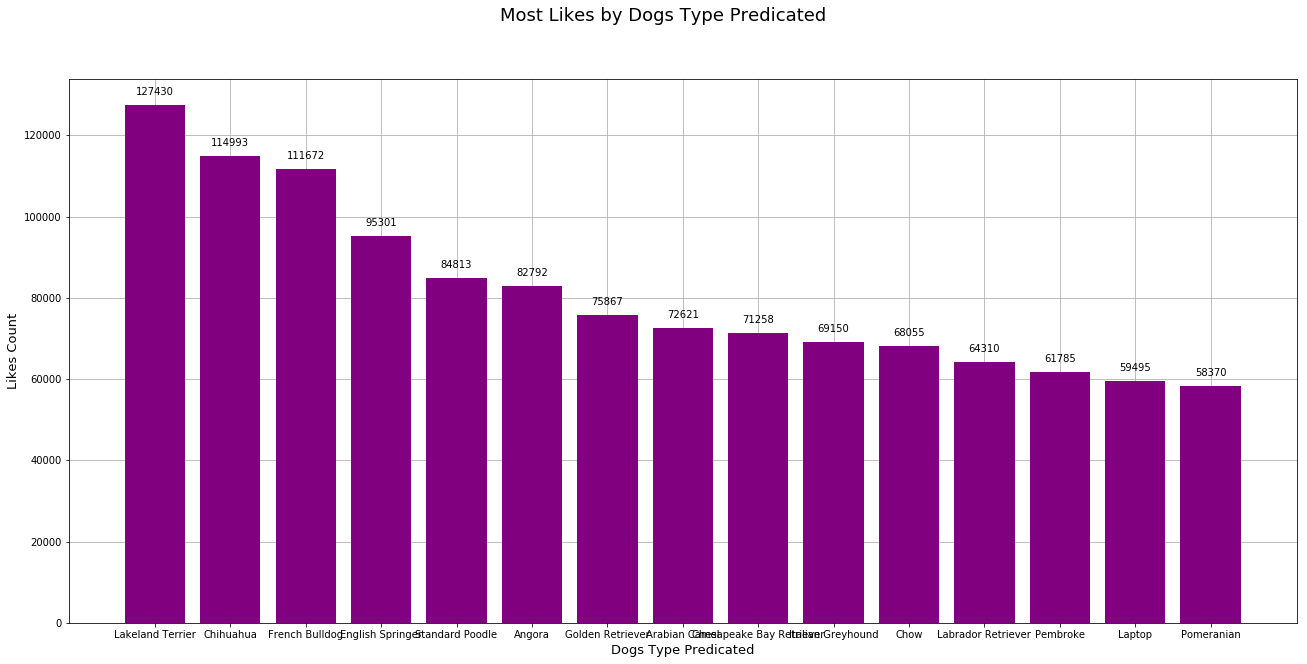

In [170]:
plt.figure(figsize=(22,10))



y_pos = np.arange(len(df_insight_1_1['type_predication_1'][:15]))

plt.bar(y_pos, df_insight_1_1['Likes Count'][:15], align='center', color='purple',zorder=3)
plt.xticks(y_pos, df_insight_1_1['type_predication_1'][:15])

plt.suptitle('Most Likes by Dogs Type Predicated', fontsize=18)
plt.xlabel('Dogs Type Predicated', fontsize=13)
plt.ylabel('Likes Count', fontsize=13)
plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, df_insight_1_1['Likes Count']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

#### Conclusion 

- A correlation of 0.92 indicates a strong, positive association between the retweets and likes. Chihiahua has the most retweets with 53390 and Lakeland Terrier with the most likes with 127430.

### 4.2.2 Insight 2

> Count of dogs by its kind

In [171]:
df_twitter['kind'].value_counts()

None       546
doggo       44
pupper      43
puppo       17
floofer      4
Name: kind, dtype: int64

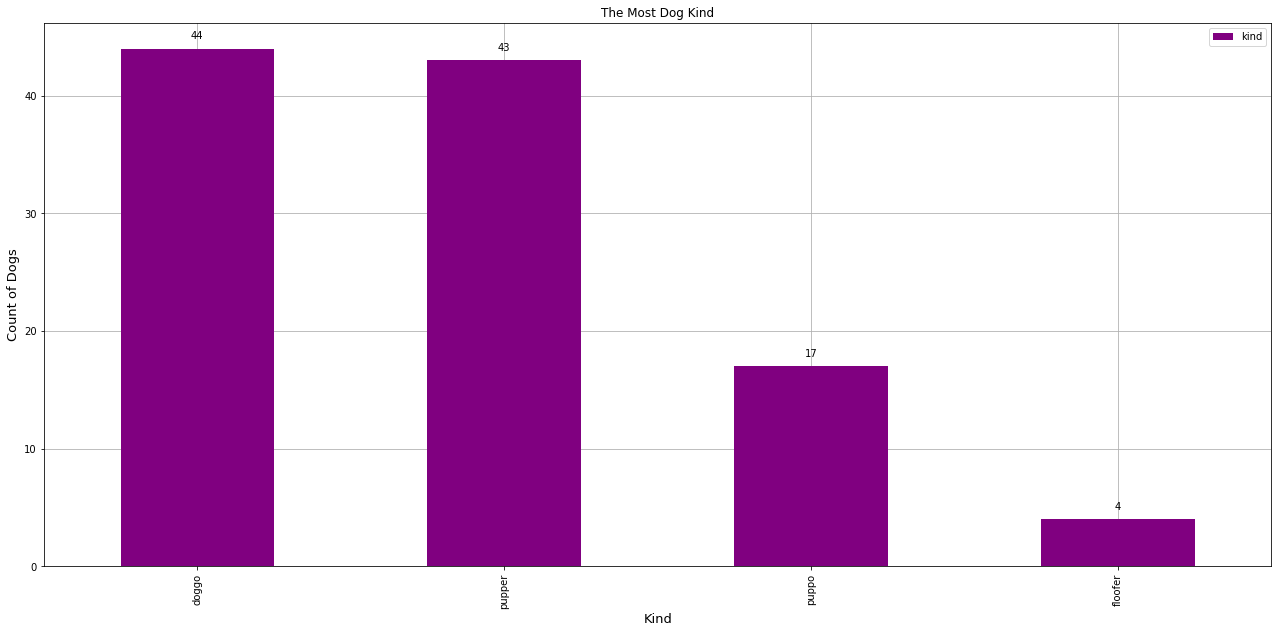

In [172]:
plt.figure(figsize=(22,10))


df_insight_2=df_twitter.groupby('kind').filter(lambda x: len(x) >= 0)
df_insight_2['kind'].value_counts()[1:].plot(kind = 'bar',align='center', color='purple',zorder=3)
plt.title('The Most Dog Kind');
plt.ylabel('Count of Dogs', fontsize=13);
plt.xlabel('Kind', fontsize=13);

plt.legend(loc='best')
plt.grid('True')

for x,y in zip ( y_pos, df_insight_2['kind'].value_counts()[1:]):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


#### Conclusion 

- Doggo kind is the most count of dogs with 44. Pupper is close by 43 dogs.

### 4.2.3 Insight 3

> Tweets by Month

In [173]:
# Creating Group by to calculate Count of Movies
df_insight_3 = df_twitter.groupby(['month_x']).month_x.count().sort_values().groupby(level=0).tail(1).to_frame()
df_insight_3.columns = ['# of Tweets']
df_insight_3.reset_index(level=[0],inplace=True)
df_insight_3.sort_values(by='month_x',inplace=True)

In [174]:
df_insight_3

,month_x,# of Tweets
11,1,66
9,2,63
3,3,46
0,4,41
1,5,43
2,6,43
6,7,58
7,8,60
8,9,62
10,10,65


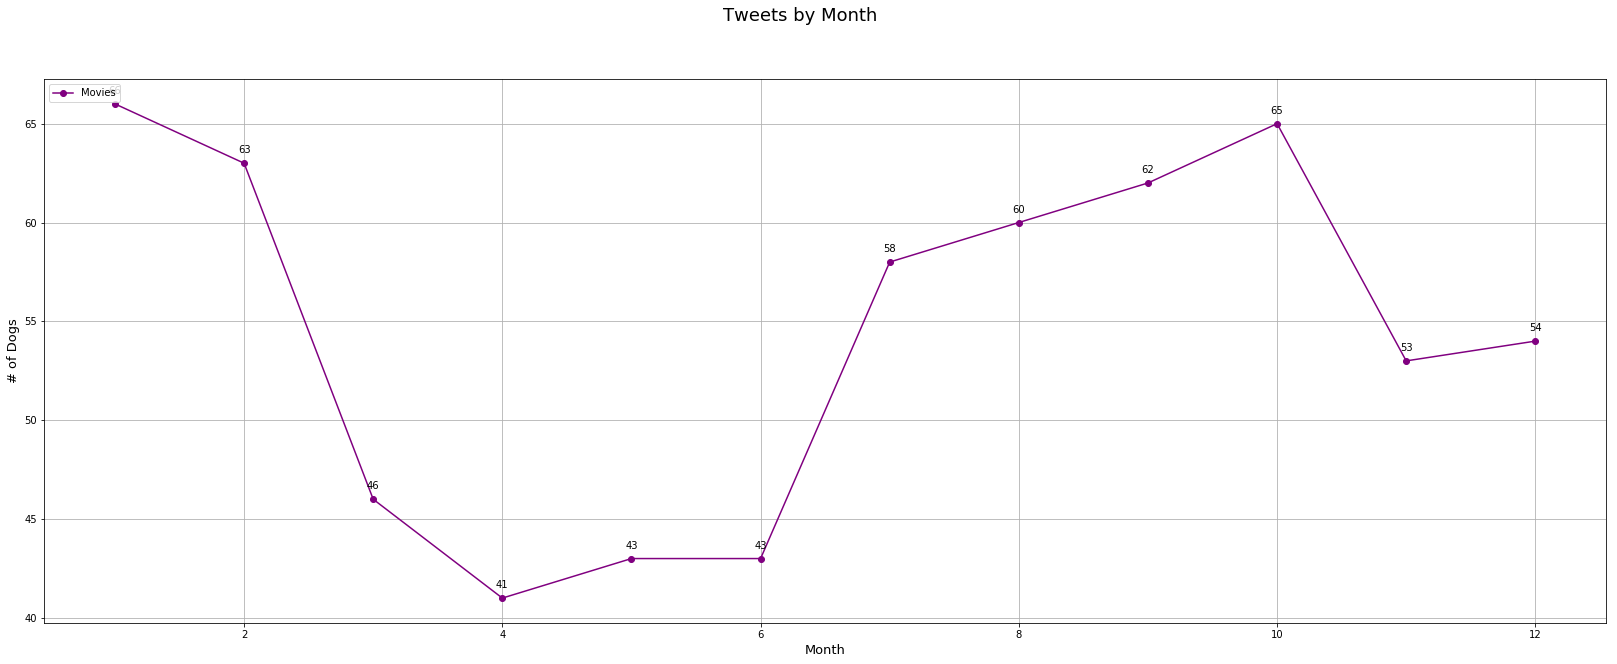

In [175]:
plt.figure(figsize=(28,10))
plt.plot(df_insight_3['month_x'], df_insight_3['# of Tweets'], color='purple', marker='o', label='Movies')

plt.suptitle('Tweets by Month', fontsize=18)
plt.xlabel('Month', fontsize=13)
plt.ylabel('# of Dogs', fontsize=13)
plt.legend(loc='best')
plt.grid('True')
plt.legend(loc=2)

for x,y in zip(df_insight_3['month_x'], df_insight_3['# of Tweets']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.show()

In [176]:
df_insight_3

,month_x,# of Tweets
11,1,66
9,2,63
3,3,46
0,4,41
1,5,43
2,6,43
6,7,58
7,8,60
8,9,62
10,10,65


#### Conclusion 

- Most of the tweets have posted in the month of January with 68 tweets after October with 65 tweets.

# 5. Reports

Please check wrangle_report.pdf and act_report.pdf